In [1]:
# from functions import getData,getAccuracy
import functions
from sklearn.model_selection import train_test_split as ttt

xTrain,xTest,yTrain,yTest = functions.getData()
xSplit_Train,xSplit_Test,ySplit_Train,ySplit_Test = ttt(xTrain,yTrain,test_size=0.3,random_state= 0)


In [71]:
from sklearn import svm
import numpy
# we train the model
# we choose linear kernel
clf = svm.SVC(kernel = 'linear')
yReshSplit_Test= numpy.array(ySplit_Train).reshape(numpy.array(ySplit_Train).size)
clf.fit(xSplit_Train.values,yReshSplit_Test)




SVC(kernel='linear')

In [72]:
# try the model
y_pred_linear = clf.predict(xSplit_Test)
expected_Reshaped = numpy.array(ySplit_Test).reshape(ySplit_Test.size)
test = numpy.array(expected_Reshaped == numpy.array(y_pred_linear)).sum()
accuracy  = test /expected_Reshaped.size *100
print(accuracy)
# we get an 79% accuracy on the training set

# try in the test dataset
# 99 in the test, THIS IS WEIRD
y_pred_linearTest = clf.predict(xTest)
expected_ReshapedTest = numpy.array(yTest).reshape(yTest.size)
expected2 = numpy.array(yTest).ravel() # same as previous line

test = numpy.array(expected_ReshapedTest == numpy.array(y_pred_linearTest)).sum()
accuracy  = test /expected_ReshapedTest.size *100
print(accuracy)



79.06976744186046
99.69788519637463


c:\Users\baldo\Documents\Progra\kaggleTitanic\venv\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\baldo\Documents\Progra\kaggleTitanic\venv\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
# perform pca


c:\Users\baldo\Documents\Progra\kaggleTitanic\venv\lib\site-packages\mlxtend\plotting\decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


<AxesSubplot:>

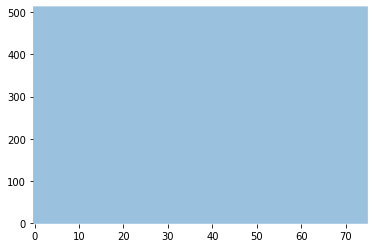

In [73]:
# try to graphically represent it DOES NOT WORK

from mlxtend.plotting import plot_decision_regions
X = xSplit_Train
X = X.rename(columns= {"PassengerId":"0","Pclass":"1","Sex": "2","Age" : "3","SibSp":"4", "Parch" :"5", "Fare":"6" })
y = numpy.array(ySplit_Train).ravel()

plot_decision_regions(X=X.values, 
                      y=y,
                      clf=clf,
                      feature_index= (3,6),
                    #   filler_feature_values= {0: "PassengerId", 1 :"Pclass",2:"Sex", 4: "SibSp", 5 :"Parch" } ,
                      filler_feature_values= {0: 0, 1 :1,2:2, 4:4, 5 :5 } ,

                      legend=2)


# print(xSplit_Train.loc[:,['Age','Fare']])

(499, 1)


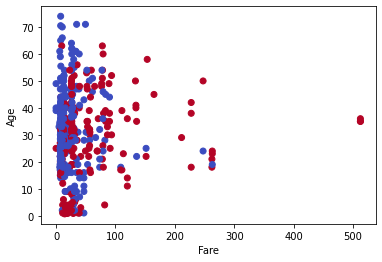

In [52]:
# try to graphically represent it
import matplotlib.pyplot as plt

X = xSplit_Train 
y = ySplit_Train
h =1
# we tryto represent age and fare
x_min, x_max = X['Fare'].min() - 1, X['Fare'].max() + 1
y_min, y_max =X['Age'].min() - 1, X['Age'].max() + 1
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h),numpy.arange(y_min, y_max, h))

# Z = clf.predict(numpy.c_[xx.ravel(),yy.ravel()])
Z= y_pred_linear
# plt.contourf(numpy.array(X['Fare']).reshape(X['Fare'].size,1), numpy.array(X['Age']).reshape(X['Age'].size,1), Z.reshape(Z.size,1), cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X['Fare'],X['Age'],c = y.Survived, cmap = plt.cm.coolwarm)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())

plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()



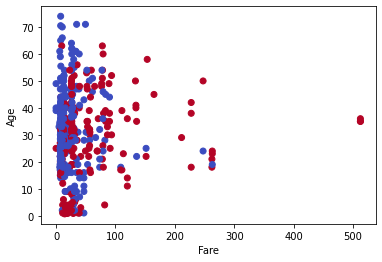

In [53]:
# plot the points 
import matplotlib.pyplot as plt

X = xSplit_Train 
y = ySplit_Train

plt.scatter(X['Fare'],X['Age'],c = y.Survived, cmap = plt.cm.coolwarm)
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

In [35]:
# gamma svm

clfQuad = svm.SVC(C= 1e6, gamma =1e-6)
yReshSplit_Test= numpy.array(ySplit_Train).reshape(numpy.array(ySplit_Train).size)
clfQuad.fit(xSplit_Train,yReshSplit_Test)

# try the model
y_pred_linear = clfQuad.predict(xSplit_Test)
expected_Reshaped = numpy.array(ySplit_Test).reshape(ySplit_Test.size)
test = numpy.array(expected_Reshaped == numpy.array(y_pred_linear)).sum()
accuracy  = test /expected_Reshaped.size *100
print(accuracy)



78.6046511627907
